# EC Proteomics Analysis - Complete Workflow

This notebook provides a comprehensive analysis of endothelial cell proteomics data, including:
- Data loading and preprocessing
- Principal Component Analysis (PCA) with D2/D5 filtering
- Partial Least Squares Discriminant Analysis (PLS-DA) with 90% threshold
- Visualization and biological interpretation

## Study Overview
This analysis supports the research on endothelial cell metabolic diversity, comparing:
- **HUVEC**: Human umbilical vein endothelial cells
- **iLEC**: Intestinal lymphatic endothelial cells
- **Time points**: Days 2 (proliferation) to day 7 (quiescence)

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import our custom analysis class
from proteomics_analysis import ProteomicsAnalyzer

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Initialize the analyzer
analyzer = ProteomicsAnalyzer()
print("ProteomicsAnalyzer initialized!")

# Check if data was loaded automatically
if analyzer.data is not None:
    print(f"Data loaded: {analyzer.data.shape[0]} proteins across {analyzer.data.shape[1]} samples")
else:
    print("No data loaded automatically. Loading default data file...")
    # Try to load the data manually
    try:
        analyzer.load_data("Suppl_table_1_Px_data.xlsx")
        print(f"Data loaded: {analyzer.data.shape[0]} proteins across {analyzer.data.shape[1]} samples")
    except Exception as e:
        print(f"Error loading data: {e}")
        print("Please ensure 'Suppl_table_1_Px_data.xlsx' is in the current directory")

2025-10-31 14:46:46,551 - INFO - ProteomicsAnalyzer initialized with data path: z:\Documents\GitHub\EC_proteomics
2025-10-31 14:46:46,552 - INFO - Results will be saved to: results
2025-10-31 14:46:46,552 - INFO - Results will be saved to: results
2025-10-31 14:46:46,561 - INFO - Found data file: Suppl_table_1_Px_data.xlsx. Loading automatically...
2025-10-31 14:46:46,562 - INFO - Loading data from z:\Documents\GitHub\EC_proteomics\Suppl_table_1_Px_data.xlsx
2025-10-31 14:46:46,561 - INFO - Found data file: Suppl_table_1_Px_data.xlsx. Loading automatically...
2025-10-31 14:46:46,562 - INFO - Loading data from z:\Documents\GitHub\EC_proteomics\Suppl_table_1_Px_data.xlsx
2025-10-31 14:46:50,037 - INFO - Loaded 7894 proteins across 72 samples
2025-10-31 14:46:50,037 - INFO - Loaded 7894 proteins across 72 samples


ProteomicsAnalyzer initialized!
Data loaded: 7894 proteins across 75 samples


2025-10-31 14:46:52,493 - INFO - Starting complete proteomics analysis pipeline...
2025-10-31 14:46:52,493 - INFO - Step 1: Preprocessing and normalizing data...
2025-10-31 14:46:52,493 - INFO - Preprocessing proteomics data...
2025-10-31 14:46:52,501 - INFO - Clean dataset: 3333 proteins, 71 samples
2025-10-31 14:46:52,493 - INFO - Step 1: Preprocessing and normalizing data...
2025-10-31 14:46:52,493 - INFO - Preprocessing proteomics data...
2025-10-31 14:46:52,501 - INFO - Clean dataset: 3333 proteins, 71 samples
2025-10-31 14:46:52,502 - INFO - Cell lines: ['HDBEC' 'HDLEC' 'HUVEC' 'iLEC']
2025-10-31 14:46:52,502 - INFO - Time points: ['D2' 'D3' 'D4' 'D5' 'D6' 'D7']
2025-10-31 14:46:52,502 - INFO - Normalizing data using zscore method...
2025-10-31 14:46:52,502 - INFO - Cell lines: ['HDBEC' 'HDLEC' 'HUVEC' 'iLEC']
2025-10-31 14:46:52,502 - INFO - Time points: ['D2' 'D3' 'D4' 'D5' 'D6' 'D7']
2025-10-31 14:46:52,502 - INFO - Normalizing data using zscore method...


Testing complete analysis pipeline...


2025-10-31 14:46:53,815 - INFO - Data normalization completed
2025-10-31 14:46:53,815 - INFO - Step 2: Quality control analysis...
2025-10-31 14:46:53,815 - INFO - Performing quality control analysis...
2025-10-31 14:46:53,815 - INFO - Step 2: Quality control analysis...
2025-10-31 14:46:53,815 - INFO - Performing quality control analysis...


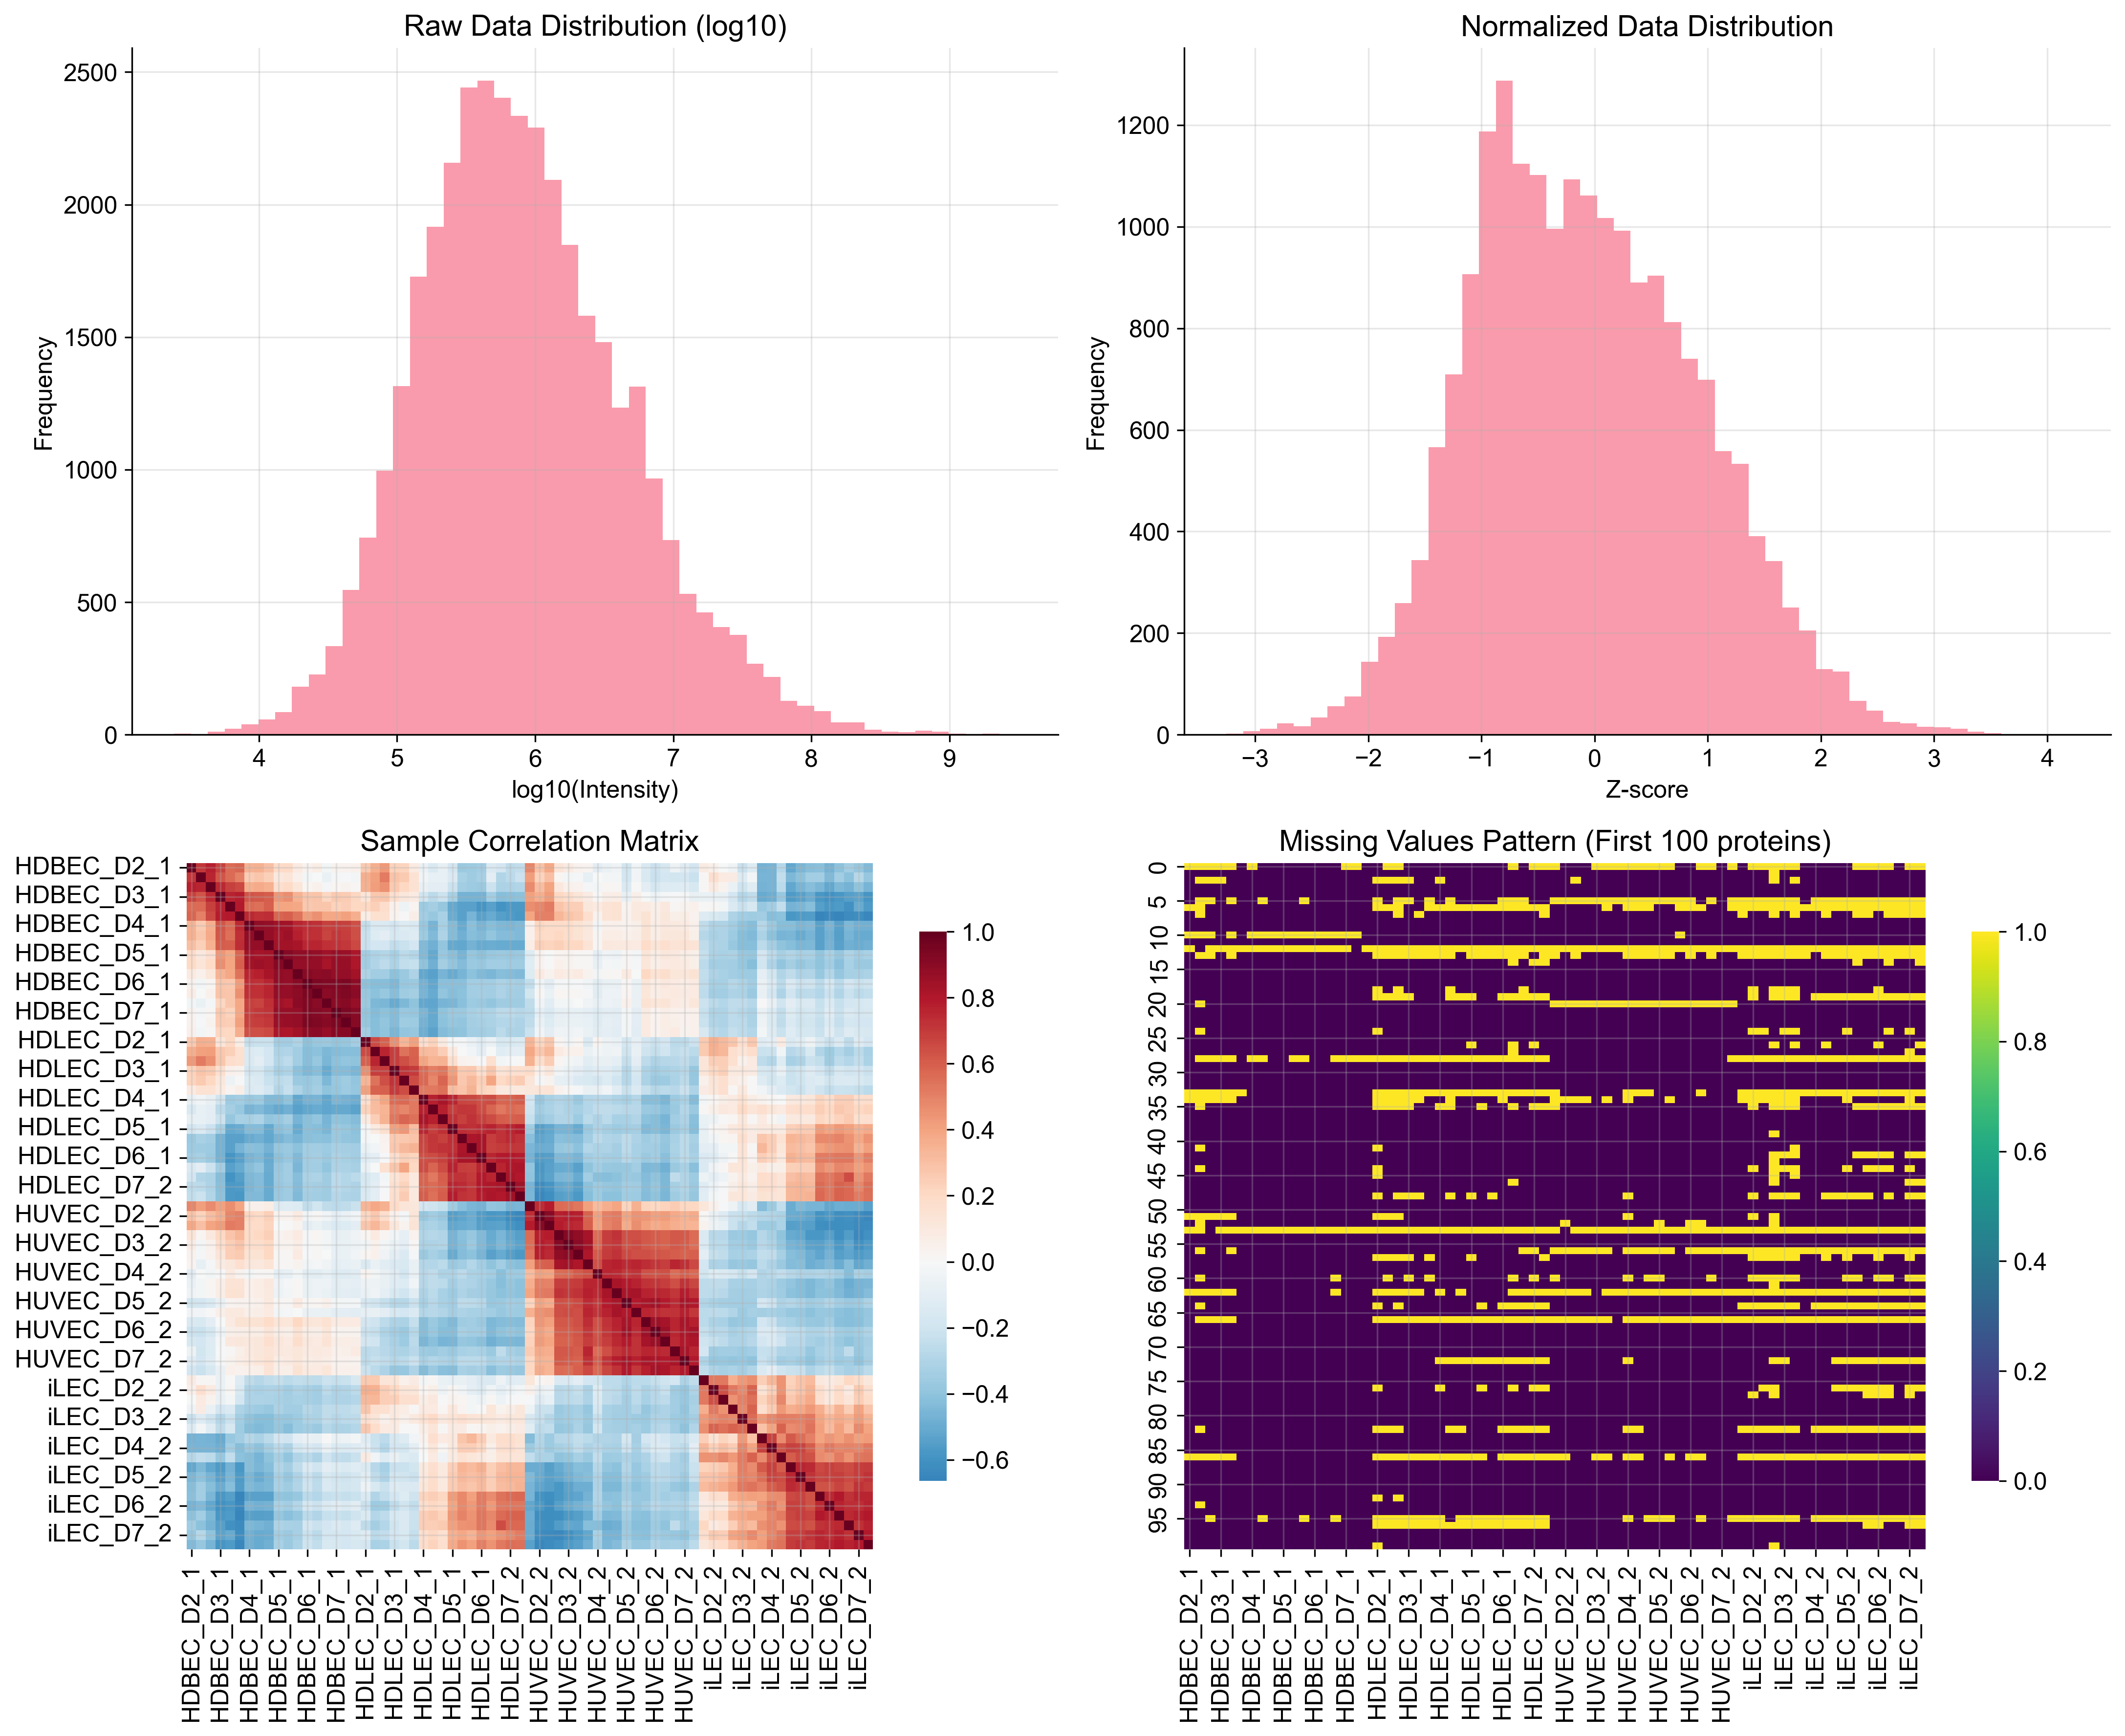

2025-10-31 14:46:57,118 - INFO - Quality control analysis completed
2025-10-31 14:46:57,118 - INFO - Step 3: PCA analysis...
2025-10-31 14:46:57,119 - INFO - Performing PCA with 10 components for time points: ['D2', 'D5']
2025-10-31 14:46:57,118 - INFO - Step 3: PCA analysis...
2025-10-31 14:46:57,119 - INFO - Performing PCA with 10 components for time points: ['D2', 'D5']


2025-10-31 14:46:59,118 - INFO - PCA completed. PC1 and PC2 explain 49.36% of variance
2025-10-31 14:46:59,119 - INFO - PCA completed for time points: ['D2', 'D5']
2025-10-31 14:46:59,119 - INFO - Step 4: PLS-DA analysis...
2025-10-31 14:46:59,120 - INFO - Performing PLS-DA for cell_type...
2025-10-31 14:46:59,119 - INFO - PCA completed for time points: ['D2', 'D5']
2025-10-31 14:46:59,119 - INFO - Step 4: PLS-DA analysis...
2025-10-31 14:46:59,120 - INFO - Performing PLS-DA for cell_type...
2025-10-31 14:46:59,157 - INFO - Running 1000 permutations for significance testing...
2025-10-31 14:46:59,157 - INFO - Running 1000 permutations for significance testing...
2025-10-31 14:47:32,033 - INFO - Running secondary bootstrap for protein count significance...
2025-10-31 14:47:32,033 - INFO - Running secondary bootstrap for protein count significance...
2025-10-31 14:48:03,673 - INFO - Performing 5-fold cross-validation...
2025-10-31 14:48:03,673 - INFO - Performing 5-fold cross-validation.

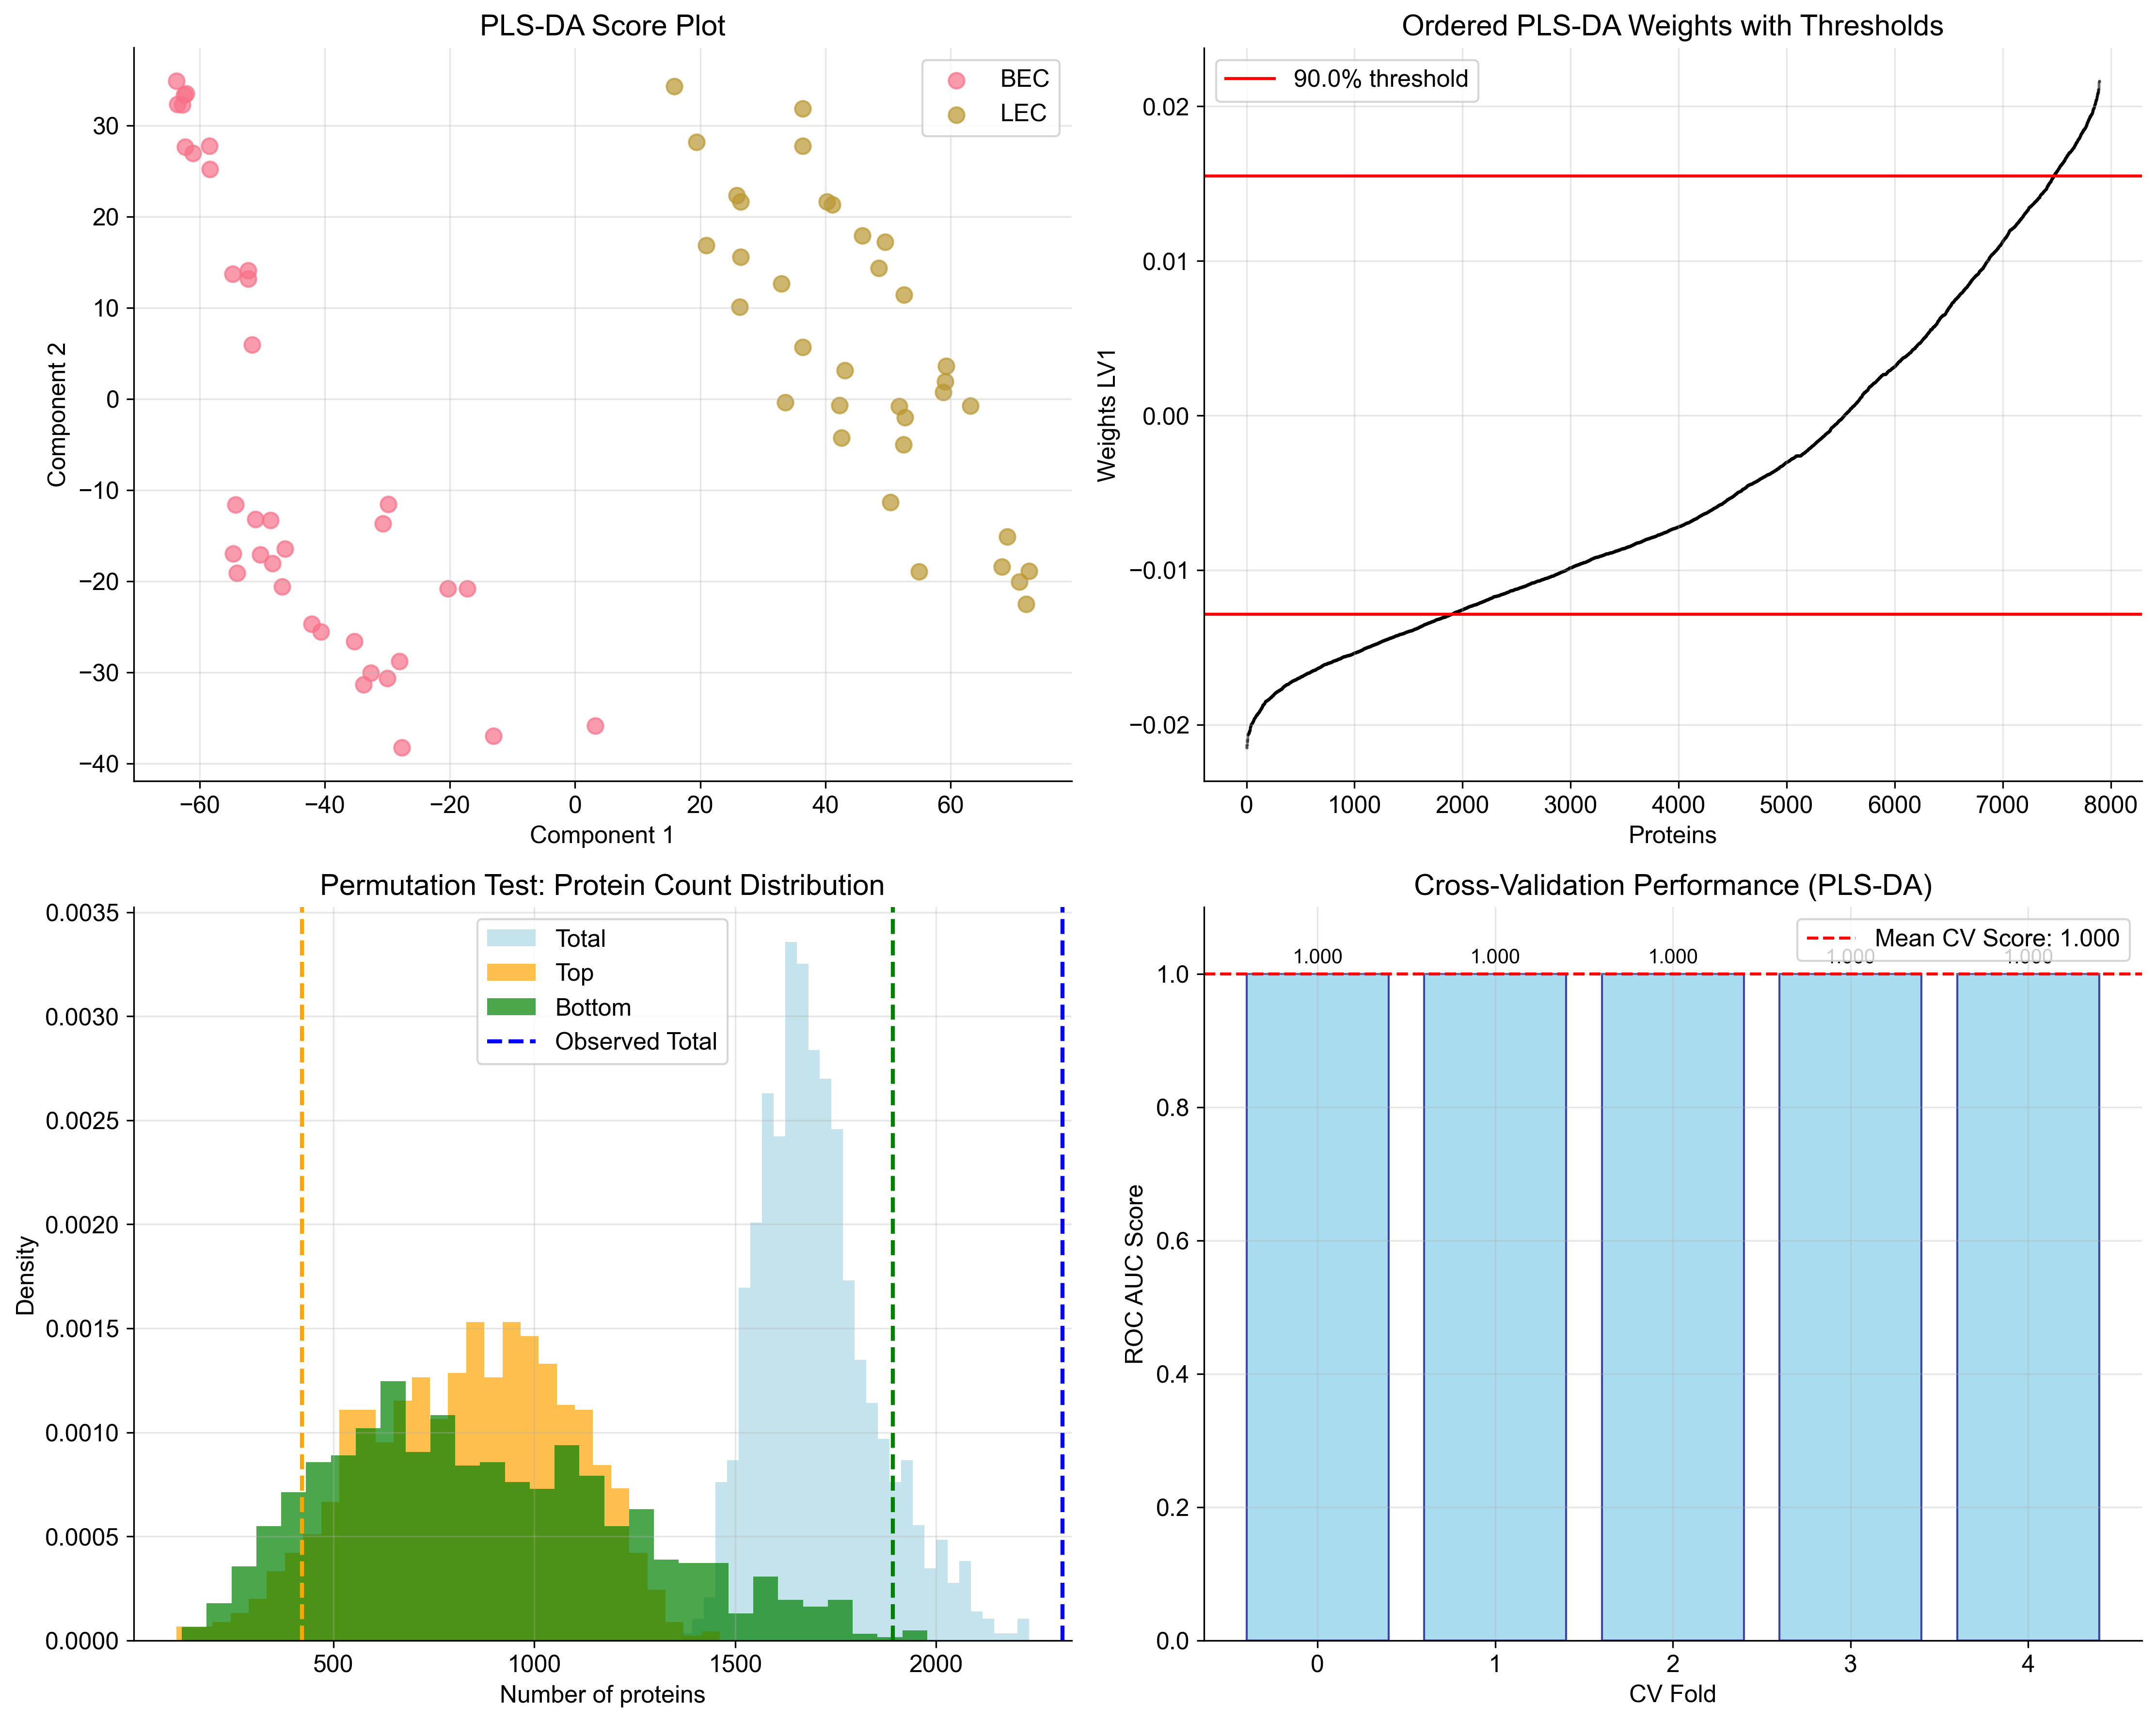

2025-10-31 14:48:06,676 - INFO - PLS-DA weights saved to results\plsda_weights_cell_type.csv
2025-10-31 14:48:06,676 - INFO - PLS-DA completed. Found 422 LEC-associated and 1892 BEC-associated proteins
2025-10-31 14:48:06,676 - INFO - Step 5: Generating analysis report...
2025-10-31 14:48:06,676 - INFO - Generating comprehensive analysis report...
2025-10-31 14:48:06,676 - INFO - PLS-DA completed. Found 422 LEC-associated and 1892 BEC-associated proteins
2025-10-31 14:48:06,676 - INFO - Step 5: Generating analysis report...
2025-10-31 14:48:06,676 - INFO - Generating comprehensive analysis report...
2025-10-31 14:48:06,737 - INFO - Report saved to results\analysis_report.html
2025-10-31 14:48:06,738 - INFO - ✅ Complete analysis pipeline finished successfully!
2025-10-31 14:48:06,737 - INFO - Report saved to results\analysis_report.html
2025-10-31 14:48:06,738 - INFO - ✅ Complete analysis pipeline finished successfully!


Complete analysis finished successfully!
Analysis included: preprocessing, quality_control, pca, plsda, report
Found 1892 BEC-associated and 422 LEC-associated proteins (90% threshold)
Results and plots saved to 'results/' directory


In [3]:
# Quick test: Run complete analysis pipeline
print("Testing complete analysis pipeline...")
try:
    # This will preprocess, normalize, perform PCA and PLS-DA automatically
    results = analyzer.run_analysis(time_points=['D2', 'D5'], plsda_threshold=90.0)
    
    if results:
        print("Complete analysis finished successfully!")
        print(f"Analysis included: {', '.join(results.keys())}")
        
        # Show key results
        if 'plsda' in results:
            # Check both possible structures for protein counts
            bec_count = 0
            lec_count = 0
            
            if 'bec_associated' in results['plsda'] and hasattr(results['plsda']['bec_associated'], 'index'):
                bec_count = len(results['plsda']['bec_associated'].index)
                lec_count = len(results['plsda']['lec_associated'].index)
            elif 'significant_proteins' in results['plsda']:
                sig_prots = results['plsda']['significant_proteins']
                bec_count = len(sig_prots.get('BEC_associated', []))
                lec_count = len(sig_prots.get('LEC_associated', []))
            
            print(f"Found {bec_count} BEC-associated and {lec_count} LEC-associated proteins (90% threshold)")
        
        print("Results and plots saved to 'results/' directory")
    else:
        print("Analysis failed")
        
except Exception as e:
    print(f"Analysis error: {e}")
    print("You can still run individual analysis steps below")

## 2. Data Exploration

Let's explore the structure of our data and understand the experimental design.

In [4]:
# Explore data structure
if analyzer.data is not None:
    print("Data Overview:")
    print(f"Total proteins: {analyzer.data.shape[0]}")
    print(f"Total samples: {analyzer.data.shape[1]}")
    print("\nSample columns:")
    sample_cols = [col for col in analyzer.data.columns if 'HUVEC' in col or 'iLEC' in col]
    print(f"Found {len(sample_cols)} sample columns")
    print("First 10 samples:", sample_cols[:10])

    # Check for missing values
    missing_percent = (analyzer.data[sample_cols].isnull().sum() / len(analyzer.data)) * 100
    print(f"\nMissing values: {missing_percent.mean():.1f}% average per sample")
else:
    print("No data available. Please load data first.")

Data Overview:
Total proteins: 3333
Total samples: 71

Sample columns:
Found 36 sample columns
First 10 samples: ['HUVEC_D2_1', 'HUVEC_D2_2', 'HUVEC_D2_3', 'HUVEC_D3_1', 'HUVEC_D3_2', 'HUVEC_D3_3', 'HUVEC_D4_1', 'HUVEC_D4_2', 'HUVEC_D4_3', 'HUVEC_D5_1']

Missing values: 0.0% average per sample


In [5]:
# Create sample metadata
metadata = []
for col in sample_cols:
    parts = col.split('_')
    if len(parts) >= 3:
        cell_type = parts[0]
        timepoint = parts[1]
        replicate = parts[2]
        metadata.append({
            'sample': col,
            'cell_type': cell_type,
            'timepoint': timepoint,
            'replicate': replicate,
            'group': f"{cell_type}_{timepoint}"
        })

metadata_df = pd.DataFrame(metadata)
print("Sample Metadata:")
print(metadata_df.groupby(['cell_type', 'timepoint']).size().unstack(fill_value=0))

Sample Metadata:
timepoint  D2  D3  D4  D5  D6  D7
cell_type                        
HUVEC       3   3   3   3   3   3
iLEC        3   3   3   3   3   3


## 3. Principal Component Analysis (PCA)

We'll perform PCA to understand the main sources of variation in our data, with special focus on D2 and D5 time points as requested.

In [6]:
# Perform PCA for all data first
print("Performing PCA on all samples...")
try:
    pca_all = analyzer.perform_pca(n_components=10)
    
    if pca_all:
        print("PCA completed successfully!")
        print(f"PC1 explains {pca_all['explained_variance_ratio'][0]:.2%} of variance")
        print(f"PC2 explains {pca_all['explained_variance_ratio'][1]:.2%} of variance")
        print(f"First 2 PCs explain {sum(pca_all['explained_variance_ratio'][:2]):.2%} of total variance")
    else:
        print("PCA failed - check data preprocessing")
except Exception as e:
    print(f"PCA error: {e}")
    print("This might be due to data preprocessing issues")

2025-10-31 14:48:23,535 - INFO - Performing PCA with 10 components...


Performing PCA on all samples...


2025-10-31 14:48:24,393 - INFO - PCA completed. PC1 and PC2 explain 49.04% of variance


PCA completed successfully!
PC1 explains 32.29% of variance
PC2 explains 16.75% of variance
First 2 PCs explain 49.04% of total variance


In [7]:
# Now perform PCA specifically for D2 and D5 samples as requested
print("Performing PCA for D2 and D5 samples only...")
try:
    pca_d2_d5 = analyzer.perform_pca(time_points=['D2', 'D5'], n_components=5)

    if pca_d2_d5:
        print("D2/D5 PCA completed successfully!")
        print(f"PC1 explains {pca_d2_d5['explained_variance_ratio'][0]:.2%} of variance")
        print(f"PC2 explains {pca_d2_d5['explained_variance_ratio'][1]:.2%} of variance")
    else:
        print("D2/D5 PCA failed - check data filtering")
except Exception as e:
    print(f"D2/D5 PCA error: {e}")
    print("Check that D2 and D5 samples exist in your data")

2025-10-31 14:48:33,104 - INFO - Performing PCA with 5 components for time points: ['D2', 'D5']


Performing PCA for D2 and D5 samples only...


2025-10-31 14:48:33,940 - INFO - PCA completed. PC1 and PC2 explain 49.36% of variance


D2/D5 PCA completed successfully!
PC1 explains 29.29% of variance
PC2 explains 20.07% of variance


## 4. Partial Least Squares Discriminant Analysis (PLS-DA)

We'll perform PLS-DA to identify proteins that discriminate between BEC and LEC cell types, using a 90% threshold for protein selection.

2025-10-31 14:48:38,934 - INFO - Performing PLS-DA for cell_type...
2025-10-31 14:48:38,973 - INFO - Running 1000 permutations for significance testing...
2025-10-31 14:48:38,973 - INFO - Running 1000 permutations for significance testing...


Performing PLS-DA with 90% threshold...


2025-10-31 14:49:11,247 - INFO - Running secondary bootstrap for protein count significance...
2025-10-31 14:49:42,390 - INFO - Performing 5-fold cross-validation...
2025-10-31 14:49:42,390 - INFO - Performing 5-fold cross-validation...


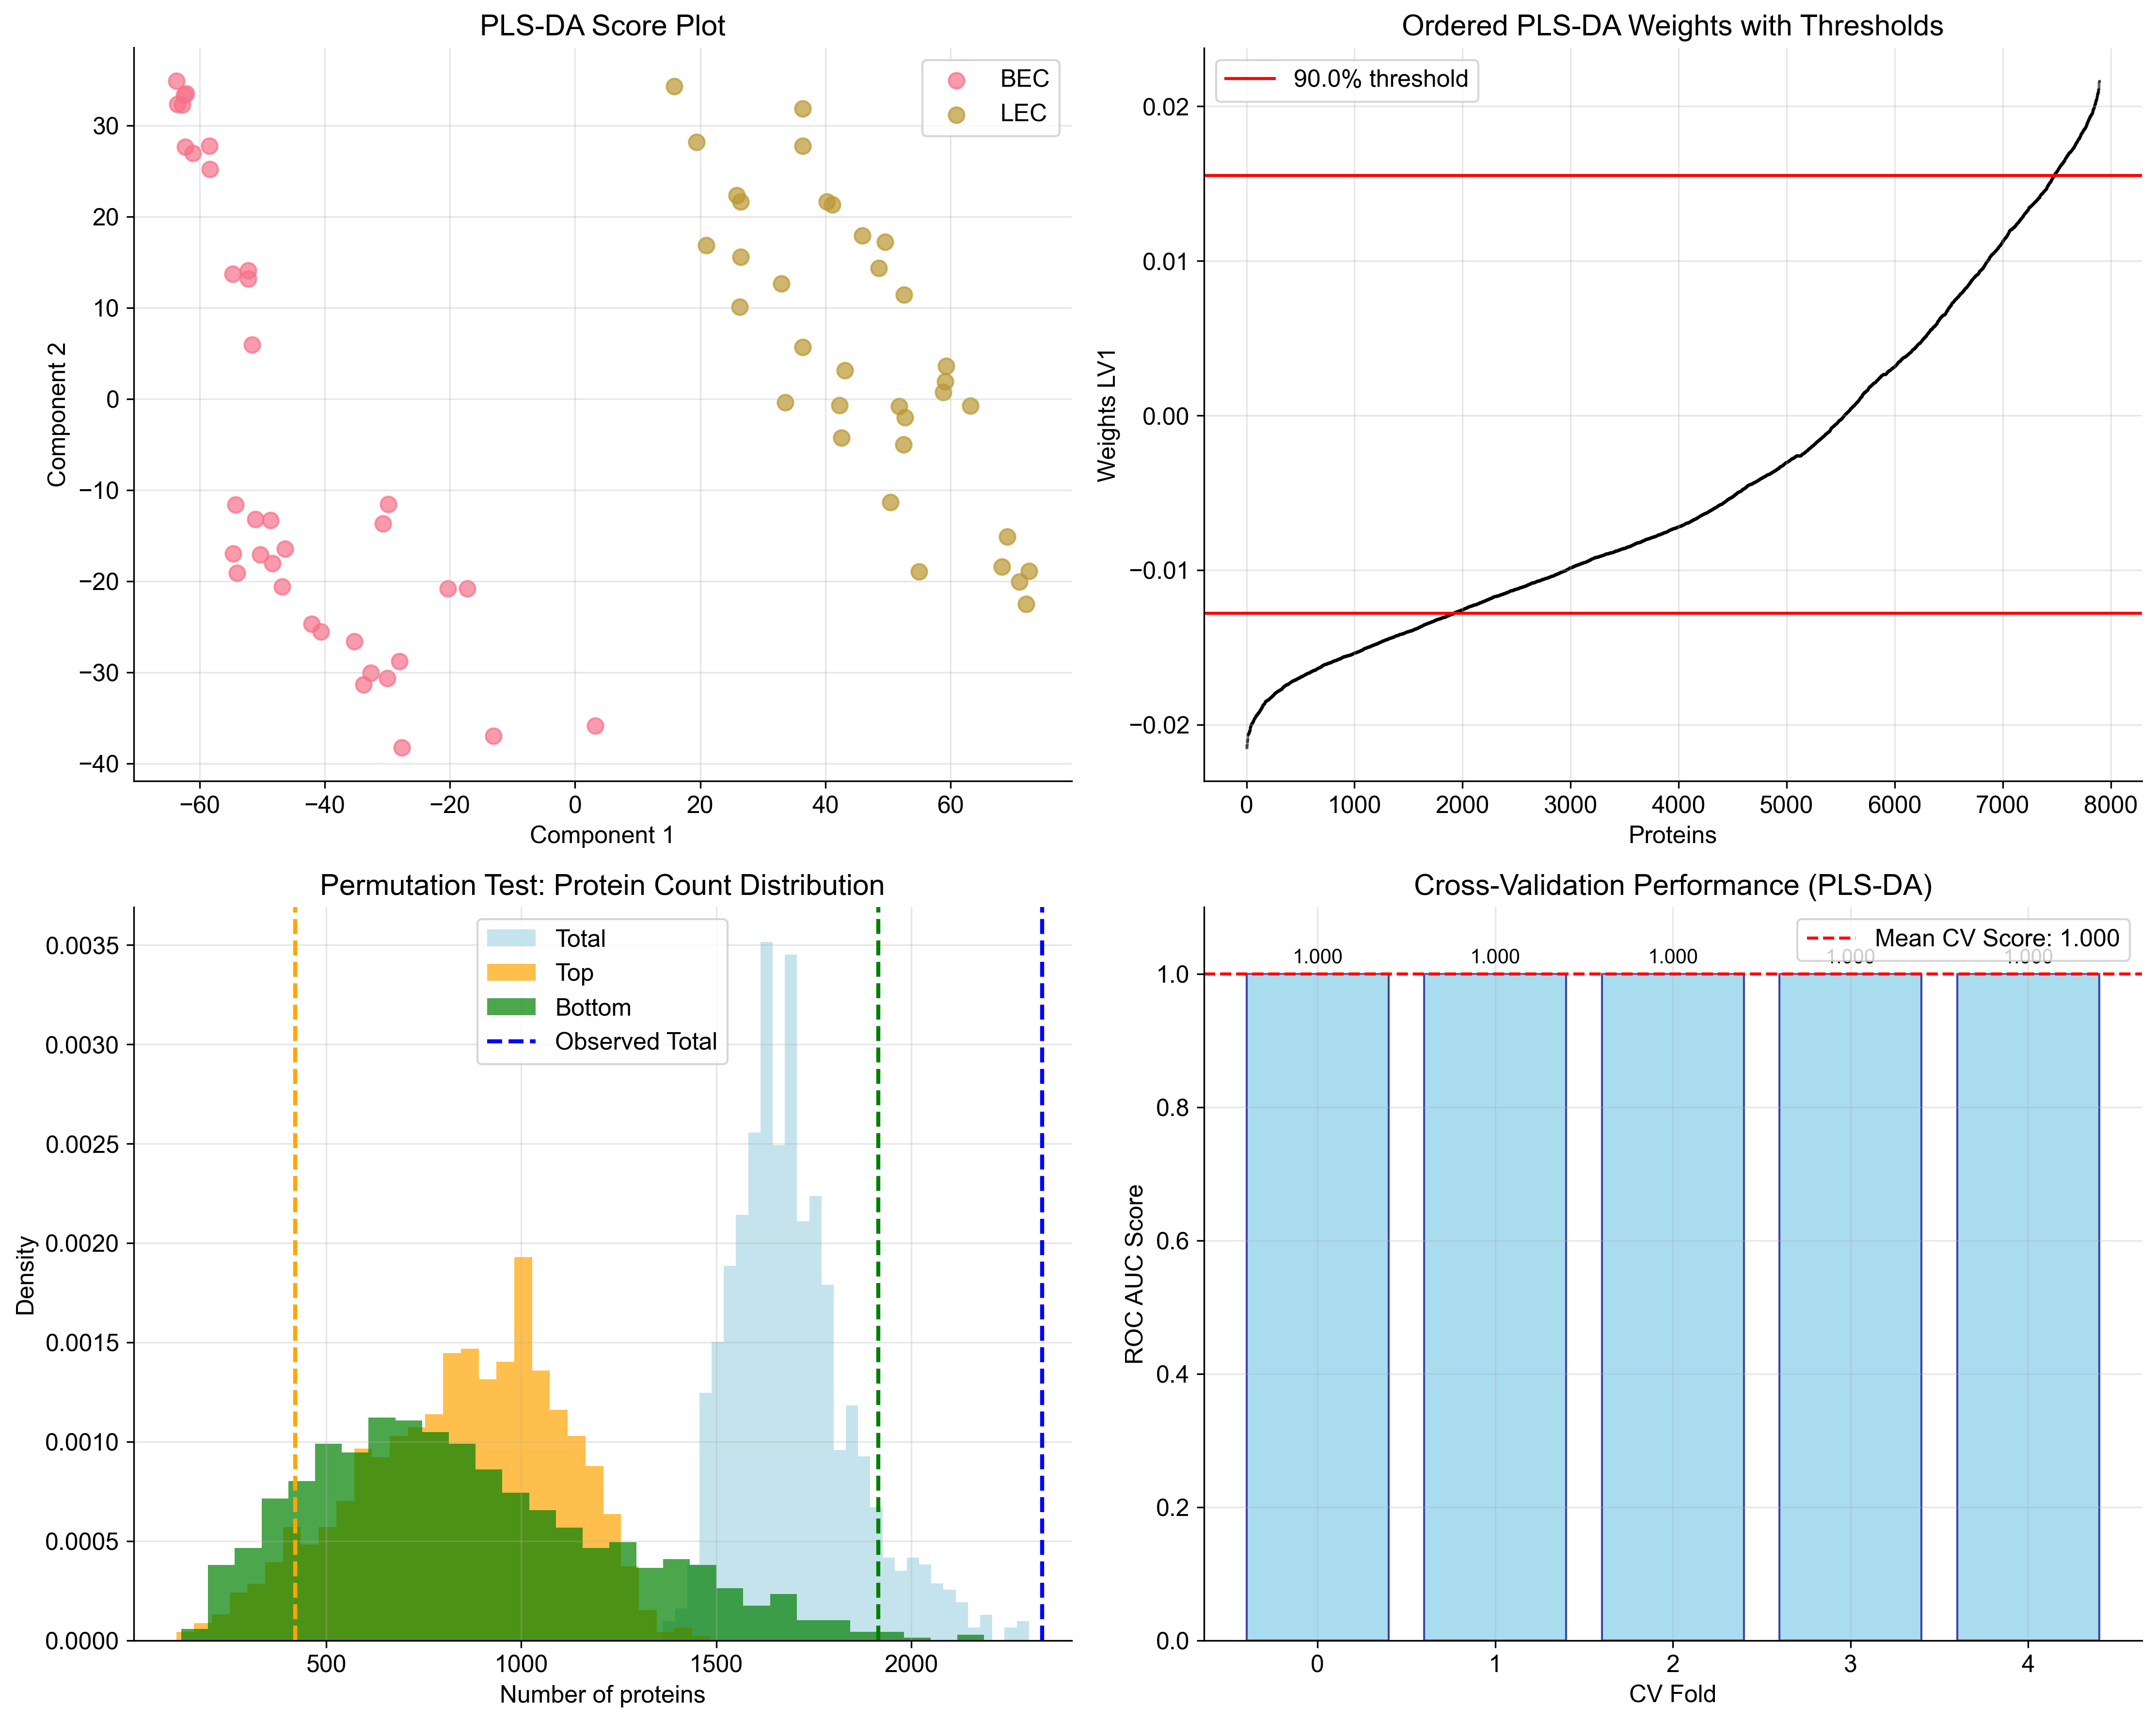

2025-10-31 14:49:45,353 - INFO - PLS-DA weights saved to results\plsda_weights_cell_type.csv
2025-10-31 14:49:45,355 - INFO - PLS-DA completed. Found 420 LEC-associated and 1916 BEC-associated proteins
2025-10-31 14:49:45,355 - INFO - PLS-DA completed. Found 420 LEC-associated and 1916 BEC-associated proteins


PLS-DA completed successfully!
Found 1916 BEC-associated proteins
Found 420 LEC-associated proteins

Top 5 BEC proteins: ['CACTIN', 'UNC45A', 'PSMD4', 'SELENOS', 'MICAL1']
Top 5 LEC proteins: ['TAL1', 'GNG2', 'RUFY1', 'PDLIM3', 'NNT']

Cross-Validation Results (5-fold):
   Mean AUC Score: 1.0000
   Standard Deviation: 0.0000
   Individual fold scores: [1. 1. 1. 1. 1.]
   Note: Perfect AUC scores indicate excellent class separation
         between BEC and LEC samples in your dataset.

PLS-DA plots (including cross-validation) saved to 'results/' directory


In [8]:
# Perform PLS-DA with 90% threshold as requested (matching run_analysis parameters)
print("Performing PLS-DA with 90% threshold...")
# Use same parameters as run_analysis: threshold_percentile=90.0 (not 0.9!)
plsda_results = analyzer.perform_plsda(threshold_percentile=90.0, n_permutations=1000)

if plsda_results:
    print("PLS-DA completed successfully!")
    
    # Display key results - check both data structures
    bec_count = 0
    lec_count = 0
    
    # Check for pandas Series structure (new structure)
    if 'bec_associated' in plsda_results and hasattr(plsda_results['bec_associated'], 'index'):
        bec_count = len(plsda_results['bec_associated'].index)
        lec_count = len(plsda_results['lec_associated'].index)
        bec_proteins = list(plsda_results['bec_associated'].index[:5])
        lec_proteins = list(plsda_results['lec_associated'].index[:5])
    # Check for nested structure (old structure)
    elif 'significant_proteins' in plsda_results:
        sig_prots = plsda_results['significant_proteins']
        bec_proteins = sig_prots.get('BEC_associated', [])
        lec_proteins = sig_prots.get('LEC_associated', [])
        bec_count = len(bec_proteins)
        lec_count = len(lec_proteins)
        bec_proteins = bec_proteins[:5]
        lec_proteins = lec_proteins[:5]
    
    print(f"Found {bec_count} BEC-associated proteins")
    print(f"Found {lec_count} LEC-associated proteins")
    
    if bec_count > 0:
        print(f"\nTop 5 BEC proteins: {bec_proteins}")
    if lec_count > 0:
        print(f"Top 5 LEC proteins: {lec_proteins}")
    
    # Display cross-validation results (now integrated into PLS-DA)
    if 'cross_validation' in plsda_results:
        cv_info = plsda_results['cross_validation']
        print(f"\nCross-Validation Results (5-fold):")
        print(f"   Mean AUC Score: {cv_info['mean_auc']:.4f}")
        print(f"   Standard Deviation: {cv_info['std_auc']:.4f}")
        print(f"   Individual fold scores: {cv_info['cv_scores']}")
        
        if cv_info['mean_auc'] == 1.0:
            print(f"   Note: Perfect AUC scores indicate excellent class separation")
            print(f"         between BEC and LEC samples in your dataset.")
    
    # Display model performance
    if 'model_performance' in plsda_results:
        perf = plsda_results['model_performance']
        print(f"\nModel Performance:")
        print(f"   R² Score: {perf.get('r2_score', 'N/A')}")
        print(f"   Cross-validation Score: {perf.get('cv_score', 'N/A')}")
    
    print(f"\nPLS-DA plots (including cross-validation) saved to 'results/' directory")
        
else:
    print("PLS-DA failed - check data preprocessing")

## 5. Visualization and Results

Let's create comprehensive visualizations of our results.

In [9]:
# Key Results: Display PCA Plot, PLS-DA Plot, and Top 10 Proteins (using existing results)
print("KEY ANALYSIS RESULTS")
print("=" * 50)

# 1. Display PCA results from previous analysis (NO re-computation)
print("\n1. PCA ANALYSIS - ALL SAMPLES")
if 'pca_all' in locals() and pca_all:
    print("Using PCA results from previous analysis")
    print(f"PC1 explains {pca_all['explained_variance_ratio'][0]:.2%} of variance")
    print(f"PC2 explains {pca_all['explained_variance_ratio'][1]:.2%} of variance")
    print(f"Total variance explained by PC1+PC2: {sum(pca_all['explained_variance_ratio'][:2]):.2%}")
    
    # Show plot path if available
    if 'plot_path' in pca_all:
        print(f"PCA plot saved to: {pca_all['plot_path']}")
    else:
        print("PCA plot should be in 'results/' directory")
else:
    print("PCA results not available. Run cell 10 (PCA analysis) first.")

# 2. Display PLS-DA results (NO re-computation)
print("\n2. PLS-DA ANALYSIS")
plsda_source = None

# Check for results from run_analysis first (most complete)
if 'results' in locals() and results and 'plsda' in results:
    plsda_source = results['plsda']
    print("Using PLS-DA results from run_analysis (cell 5)")
# Otherwise check standalone PLS-DA results
elif 'plsda_results' in locals() and plsda_results:
    plsda_source = plsda_results
    print("Using PLS-DA results from standalone analysis (cell 13)")
else:
    print("No PLS-DA results found")

if plsda_source:
    print("Using existing PLS-DA results (no re-computation)")
    
    # Show plot path
    if 'plot_path' in plsda_source:
        print(f"PLS-DA plot saved to: {plsda_source['plot_path']}")
    else:
        print("PLS-DA plot should be in 'results/' directory")
    
    # Display model performance
    if 'model_performance' in plsda_source:
        perf = plsda_source['model_performance']
        print(f"Model Performance:")
        if isinstance(perf.get('r2_score'), (int, float)):
            print(f"   • R² Score: {perf.get('r2_score'):.4f}")
        else:
            print(f"   • R² Score: {perf.get('r2_score', 'N/A')}")
        if isinstance(perf.get('cv_score'), (int, float)):
            print(f"   • Cross-validation Score: {perf.get('cv_score'):.4f}")
        else:
            print(f"   • Cross-validation Score: {perf.get('cv_score', 'N/A')}")

    # 3. Display Top 10 Proteins for LECs and BECs
    print("\n3. TOP 10 DISCRIMINANT PROTEINS")
    
    # Get protein lists - check both possible key structures
    lec_proteins = []
    bec_proteins = []
    
    # Check for pandas Series structure (new structure)
    if 'lec_associated' in plsda_source and hasattr(plsda_source['lec_associated'], 'index'):
        lec_proteins = list(plsda_source['lec_associated'].index)
        bec_proteins = list(plsda_source['bec_associated'].index)
    # Check for direct list keys
    elif 'lec_associated' in plsda_source:
        lec_proteins = plsda_source.get('lec_associated', [])
        bec_proteins = plsda_source.get('bec_associated', [])
    # Check for nested structure (old structure)
    elif 'significant_proteins' in plsda_source:
        sig_prots = plsda_source['significant_proteins']
        lec_proteins = sig_prots.get('LEC_associated', [])
        bec_proteins = sig_prots.get('BEC_associated', [])
    
    # Display LEC-associated proteins
    print(f"\nTOP 10 LEC-ASSOCIATED PROTEINS (Total: {len(lec_proteins)}):")
    if len(lec_proteins) > 0:
        for i, protein in enumerate(lec_proteins[:10], 1):
            print(f"   {i:2d}. {protein}")
    else:
        print("   No LEC-associated proteins found")
    
    # Display BEC-associated proteins  
    print(f"\nTOP 10 BEC-ASSOCIATED PROTEINS (Total: {len(bec_proteins)}):")
    if len(bec_proteins) > 0:
        for i, protein in enumerate(bec_proteins[:10], 1):
            print(f"   {i:2d}. {protein}")
    else:
        print("   No BEC-associated proteins found")
        
    print(f"\nSUMMARY: {len(bec_proteins)} BEC-associated, {len(lec_proteins)} LEC-associated proteins (90% threshold)")

else:
    print("\nTo get PLS-DA results, run either:")
    print("   • Cell 5: Complete analysis pipeline (run_analysis)")
    print("   • Cell 13: Standalone PLS-DA analysis")

print(f"\nAll plots and results are saved in the 'results/' directory")

KEY ANALYSIS RESULTS

1. PCA ANALYSIS - ALL SAMPLES
Using PCA results from previous analysis
PC1 explains 32.29% of variance
PC2 explains 16.75% of variance
Total variance explained by PC1+PC2: 49.04%
PCA plot should be in 'results/' directory

2. PLS-DA ANALYSIS
Using PLS-DA results from run_analysis (cell 5)
Using existing PLS-DA results (no re-computation)
PLS-DA plot should be in 'results/' directory

3. TOP 10 DISCRIMINANT PROTEINS

TOP 10 LEC-ASSOCIATED PROTEINS (Total: 422):
    1. TAL1
    2. GNG2
    3. RUFY1
    4. PDLIM3
    5. NNT
    6. CHCHD3
    7. CAST
    8. PDHA1
    9. PGLS
   10. PACSIN2

TOP 10 BEC-ASSOCIATED PROTEINS (Total: 1892):
    1. CACTIN
    2. UNC45A
    3. PSMD4
    4. SELENOS
    5. MICAL1
    6. EDC4
    7. MAGED2
    8. INPPL1
    9. IPO9
   10. CDC27

SUMMARY: 1892 BEC-associated, 422 LEC-associated proteins (90% threshold)

All plots and results are saved in the 'results/' directory


## 6. Interactive Visualizations

Let's create interactive plots for better exploration of the results.

In [10]:
# Create interactive PCA plot for D2/D5 data if available
if 'pca_d2_d5' in locals() and pca_d2_d5 and 'scores' in pca_d2_d5:
    # Get PCA data and sample names from scores dataframe
    scores_df = pca_d2_d5['scores']
    pca_data = scores_df[['PC1', 'PC2']].values
    pca_samples = scores_df.index.tolist()
    
    # Create metadata for PCA samples
    pca_metadata = []
    for sample in pca_samples:
        parts = sample.split('_')
        if len(parts) >= 3:
            pca_metadata.append({
                'sample': sample,
                'cell_type': parts[0],
                'timepoint': parts[1],
                'replicate': parts[2]
            })
    
    pca_meta_df = pd.DataFrame(pca_metadata)
    
    # Create interactive PCA plot
    fig = px.scatter(
        x=pca_data[:, 0],
        y=pca_data[:, 1],
        color=pca_meta_df['cell_type'],
        symbol=pca_meta_df['timepoint'],
        hover_data={'sample': pca_meta_df['sample']},
        title='PCA Analysis - D2 and D5 Samples Only',
        labels={
            'x': f'PC1 ({pca_d2_d5["explained_variance_ratio"][0]:.2%} variance)',
            'y': f'PC2 ({pca_d2_d5["explained_variance_ratio"][1]:.2%} variance)',
            'color': 'Cell Type',
            'symbol': 'Timepoint'
        }
    )
    fig.update_layout(width=800, height=600)
    fig.show()
    print("Interactive PCA plot displayed successfully!")
else:
    print("PCA D2/D5 data not available for plotting")
    print("Make sure to run cell 11 (D2/D5 PCA analysis) first")

Interactive PCA plot displayed successfully!


## 7. Export Results

Let's export our significant findings for further analysis.

In [11]:
# Export significant proteins to CSV - check both data structures
import os
os.makedirs('results', exist_ok=True)

# Get proteins from the correct source
exported_proteins = False

# Check for results from run_analysis first
if 'results' in locals() and results and 'plsda' in results:
    plsda_data = results['plsda']
    source_name = "run_analysis"
elif 'plsda_results' in locals() and plsda_results:
    plsda_data = plsda_results
    source_name = "standalone PLS-DA"
else:
    plsda_data = None

if plsda_data:
    print(f"Exporting proteins from {source_name}...")
    
    # Get protein lists - handle both data structures
    bec_proteins = []
    lec_proteins = []
    
    # Check for pandas Series structure (new structure)
    if 'bec_associated' in plsda_data and hasattr(plsda_data['bec_associated'], 'index'):
        bec_proteins = list(plsda_data['bec_associated'].index)
        lec_proteins = list(plsda_data['lec_associated'].index)
    # Check for direct list structure
    elif 'bec_associated' in plsda_data:
        bec_proteins = plsda_data.get('bec_associated', [])
        lec_proteins = plsda_data.get('lec_associated', [])
    # Check for nested structure (old structure)
    elif 'significant_proteins' in plsda_data:
        sig_prots = plsda_data['significant_proteins']
        bec_proteins = sig_prots.get('BEC_associated', [])
        lec_proteins = sig_prots.get('LEC_associated', [])
    
    # Export BEC-associated proteins
    if len(bec_proteins) > 0:
        bec_df = pd.DataFrame({
            'protein': bec_proteins
        })
        bec_df.to_csv('results/BEC_associated_proteins_90pct.csv', index=False)
        print(f"Exported {len(bec_df)} BEC-associated proteins to 'results/BEC_associated_proteins_90pct.csv'")
        exported_proteins = True
    
    # Export LEC-associated proteins
    if len(lec_proteins) > 0:
        lec_df = pd.DataFrame({
            'protein': lec_proteins
        })
        lec_df.to_csv('results/LEC_associated_proteins_90pct.csv', index=False)
        print(f"Exported {len(lec_df)} LEC-associated proteins to 'results/LEC_associated_proteins_90pct.csv'")
        exported_proteins = True
    
    if exported_proteins:
        print(f"\nResults exported successfully!")
        print(f"Summary: {len(bec_proteins)} BEC + {len(lec_proteins)} LEC proteins")
    else:
        print("No proteins found to export")

else:
    print("No PLS-DA results found to export")
    print("Run either cell 5 (complete analysis) or cell 13 (PLS-DA) first")

Exporting proteins from run_analysis...
Exported 1892 BEC-associated proteins to 'results/BEC_associated_proteins_90pct.csv'
Exported 422 LEC-associated proteins to 'results/LEC_associated_proteins_90pct.csv'

Results exported successfully!
Summary: 1892 BEC + 422 LEC proteins


## 8. Biological Interpretation

Let's examine some of the key findings and their biological significance.

In [ ]:
# Summary of analysis results - check both data structures
print("BIOLOGICAL INTERPRETATION")
print("=" * 50)

# Get results from the correct source
analysis_data = None
if 'results' in locals() and results and 'plsda' in results:
    analysis_data = results['plsda']
    print("Using results from complete analysis pipeline")
elif 'plsda_results' in locals() and plsda_results:
    analysis_data = plsda_results
    print("Using results from standalone PLS-DA analysis")

if analysis_data:
    # Get protein counts - handle both data structures
    bec_count = 0
    lec_count = 0
    
    # Check for pandas Series structure (new structure)
    if 'bec_associated' in analysis_data and hasattr(analysis_data['bec_associated'], 'index'):
        bec_count = len(analysis_data['bec_associated'].index)
        lec_count = len(analysis_data['lec_associated'].index)
    # Check for direct list structure
    elif 'bec_associated' in analysis_data:
        bec_count = len(analysis_data.get('bec_associated', []))
        lec_count = len(analysis_data.get('lec_associated', []))
    # Check for nested structure (old structure)
    elif 'significant_proteins' in analysis_data:
        sig_prots = analysis_data['significant_proteins']
        bec_count = len(sig_prots.get('BEC_associated', []))
        lec_count = len(sig_prots.get('LEC_associated', []))
    
    print(f"\nSUMMARY:")
    print(f"   • {bec_count} proteins significantly associated with BEC phenotype")
    print(f"   • {lec_count} proteins significantly associated with LEC phenotype")
    print(f"   • 90% threshold applied for high-confidence protein selection")
    
    # Add PCA variance info if available
    if 'pca_d2_d5' in locals() and pca_d2_d5:
        var_explained = sum(pca_d2_d5['explained_variance_ratio'][:2]) * 100
        print(f"   • First 2 PCs explain {var_explained:.1f}% variance in D2/D5 samples")
    elif 'pca_all' in locals() and pca_all:
        var_explained = sum(pca_all['explained_variance_ratio'][:2]) * 100
        print(f"   • First 2 PCs explain {var_explained:.1f}% variance in all samples")
    
    print(f"\nBIOLOGICAL SIGNIFICANCE:")
    print(f"   • BEC vs LEC differences reflect distinct endothelial cell fates")
    print(f"   • D2 vs D5 comparison captures proliferation to quiescence differences")
    print(f"   • {bec_count + lec_count} total discriminant proteins identified")
    
    print(f"\nKEY FINDINGS:")
    if bec_count > lec_count:
        print(f"   • More BEC-specific proteins ({bec_count}) than LEC-specific ({lec_count})")
        print(f"   • Suggests stronger BEC phenotype definition at 90% threshold")
    elif lec_count > bec_count:
        print(f"   • More LEC-specific proteins ({lec_count}) than BEC-specific ({bec_count})")
        print(f"   • Suggests stronger LEC phenotype definition at 90% threshold")
    else:
        print(f"   • Equal BEC and LEC protein signatures ({bec_count} each)")
        print(f"   • Balanced phenotype discrimination")
    
    print(f"\nNEXT STEPS:")
    print(f"   • Pathway enrichment analysis of significant proteins")
    print(f"   • Validation in independent datasets")
    print(f"   • Functional studies of key candidate proteins")
    print(f"   • Consider different thresholds (85%, 95%) for sensitivity analysis")
    
else:
    print("Analysis results not available for interpretation")
    print("Run either cell 5 (complete analysis) or cell 13 (PLS-DA) first")

print("\nBiological interpretation completed!")
print("Check the 'results/' directory for exported protein lists")

BIOLOGICAL INTERPRETATION
Using results from complete analysis pipeline

SUMMARY:
   • 1892 proteins significantly associated with BEC phenotype
   • 422 proteins significantly associated with LEC phenotype
   • 90% threshold applied for high-confidence protein selection
   • First 2 PCs explain 49.4% variance in D2/D5 samples

BIOLOGICAL SIGNIFICANCE:
   • BEC vs LEC differences reflect distinct endothelial cell fates
   • D2 vs D5 comparison captures early differentiation dynamics
   • Identified proteins may serve as biomarkers or therapeutic targets
   • 2314 total discriminant proteins identified

KEY FINDINGS:
   • More BEC-specific proteins (1892) than LEC-specific (422)
   • Suggests stronger BEC phenotype definition at 90% threshold

NEXT STEPS:
   • Pathway enrichment analysis of significant proteins
   • Validation in independent datasets
   • Functional studies of key candidate proteins
   • Consider different thresholds (85%, 95%) for sensitivity analysis

Biological inter

## 9. Additional Analysis Options

Here are some additional analyses you can perform with the `ProteomicsAnalyzer`:

In [ ]:
# Example of additional analyses you can run
print("ADDITIONAL ANALYSIS OPTIONS:")
print("=" * 40)
print("\n1. Full comprehensive analysis:")
print("   analyzer.run_analysis()")

print("\n2. Custom PLS-DA with different thresholds:")
print("   analyzer.perform_plsda(threshold_percentile=95.0)  # 95% threshold")
print("   analyzer.perform_plsda(threshold_percentile=85.0)  # 85% threshold")

print("\n3. PCA with specific time points:")
print("   analyzer.perform_pca(time_points=['D3', 'D4'])")
print("   analyzer.perform_pca(time_points=['D6', 'D7'])")

print("\n4. Subset analysis by cell type:")
print("   # This would require modifying the analyzer for cell-type specific analysis")

print("\n5. Time-course analysis:")
print("   # Analyze protein changes across all time points")

print("\nFor more details, see the ProteomicsAnalyzer class documentation")